In [62]:
#importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import hvplot.pandas
import seaborn as sns

In [63]:
#Load Dataset
df=pd.read_csv("hdp_data.csv")

In [64]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [66]:
df.shape

(303, 14)

In [67]:
#Feature Engineering
#1st we'll check is there any null values and '0' indicate no null values 
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [68]:
df.target.value_counts().hvplot.bar(
    title="Heart Disease Count", xlabel='Heart Disease', ylabel='Count', 
    width=500, height=350
)

:Bars   [index]   (target)

In [69]:
#Evaluating according to sex
with_disease = df.loc[df['target']==1, 'sex'].value_counts().hvplot.bar(alpha=0.4) 
without_disease = df.loc[df['target']==0, 'sex'].value_counts().hvplot.bar(alpha=0.4) 

(without_disease * with_disease).opts(
    title="Heart Disease by Sex", xlabel='Sex', ylabel='Count',
    width=500, height=450, legend_cols=2, legend_position='top_right'
)

:Overlay
   .Bars.Sex.I  :Bars   [index]   (sex)
   .Bars.Sex.II :Bars   [index]   (sex)

In [70]:
with_disease = df.loc[df['target']==1, 'cp'].value_counts().hvplot.bar(alpha=0.4) 
without_disease = df.loc[df['target']==0, 'cp'].value_counts().hvplot.bar(alpha=0.4) 

(without_disease * with_disease).opts(
    title="Heart Disease by Chest Pain Type", xlabel='Chest Pain Type', ylabel='Count',
    width=500, height=450, legend_cols=2, legend_position='top_right'
)

:Overlay
   .Bars.Cp.I  :Bars   [index]   (cp)
   .Bars.Cp.II :Bars   [index]   (cp)

In [71]:
hwith_disease = df.loc[df['target']==1, 'fbs'].value_counts().hvplot.bar(alpha=0.4) 
without_disease = df.loc[df['target']==0, 'fbs'].value_counts().hvplot.bar(alpha=0.4) 

(without_disease * with_disease).opts(
    title="Heart Disease by fasting blood sugar", xlabel='fasting blood sugar > 120 mg/dl (1 = true; 0 = false)', 
    ylabel='Count', width=500, height=450, legend_cols=2, legend_position='top_right'
)

:Overlay
   .Bars.Fbs :Bars   [index]   (fbs)
   .Bars.Cp  :Bars   [index]   (cp)

In [72]:
with_disease = df.loc[df['target']==1, 'restecg'].value_counts().hvplot.bar(alpha=0.4) 
without_disease = df.loc[df['target']==0, 'restecg'].value_counts().hvplot.bar(alpha=0.4) 

(without_disease * without_disease).opts(
    title="Heart Disease by resting electrocardiographic results", xlabel='resting electrocardiographic results', 
    ylabel='Count', width=500, height=450, legend_cols=2, legend_position='top_right'
)

:Overlay
   .Bars.Restecg.I  :Bars   [index]   (restecg)
   .Bars.Restecg.II :Bars   [index]   (restecg)

In [73]:
categorical_val = []
continous_val = []
for column in df.columns:
    if len(df[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

In [74]:
categorical_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [75]:
 #Here we'll read and remove outlier's in the dataset using zscore matrix
from scipy import stats
z=np.abs(stats.zscore(df))
print(z)

          age       sex        cp  trestbps      chol       fbs   restecg  \
0    0.952197  0.681005  1.973123  0.763956  0.256334  2.394438  1.005832   
1    1.915313  0.681005  1.002577  0.092738  0.072199  0.417635  0.898962   
2    1.474158  1.468418  0.032031  0.092738  0.816773  0.417635  1.005832   
3    0.180175  0.681005  0.032031  0.663867  0.198357  0.417635  0.898962   
4    0.290464  1.468418  0.938515  0.663867  2.082050  0.417635  0.898962   
..        ...       ...       ...       ...       ...       ...       ...   
298  0.290464  1.468418  0.938515  0.478391  0.101730  0.417635  0.898962   
299  1.033002  0.681005  1.973123  1.234996  0.342756  0.417635  0.898962   
300  1.503641  0.681005  0.938515  0.706843  1.029353  2.394438  0.898962   
301  0.290464  0.681005  0.938515  0.092738  2.227533  0.417635  0.898962   
302  0.290464  1.468418  0.032031  0.092738  0.198357  0.417635  1.005832   

      thalach     exang   oldpeak     slope        ca      thal    target  

In [76]:
threshold=3
# here we'll print z whose greater than third deviation
print(np.where(z > 3)) #The first array contains the list of row numbers and second array contains respective col

(array([ 28,  48,  85,  92, 158, 163, 164, 204, 220, 221, 223, 246, 248,
       251, 272, 281], dtype=int64), array([ 4, 12,  4, 11, 11, 11, 11,  9,  4,  9,  3,  4,  3, 11,  7, 12],
      dtype=int64))


In [77]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3 - Q1
print(IQR)

age         13.5
sex          1.0
cp           2.0
trestbps    20.0
chol        63.5
fbs          0.0
restecg      1.0
thalach     32.5
exang        1.0
oldpeak      1.6
slope        1.0
ca           1.0
thal         1.0
target       1.0
dtype: float64


In [78]:
df = df[(z < 3).all(axis=1)]
df.shape #set the lower bound

(287, 14)

In [79]:
df=df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape #set the upper bound

(228, 14)

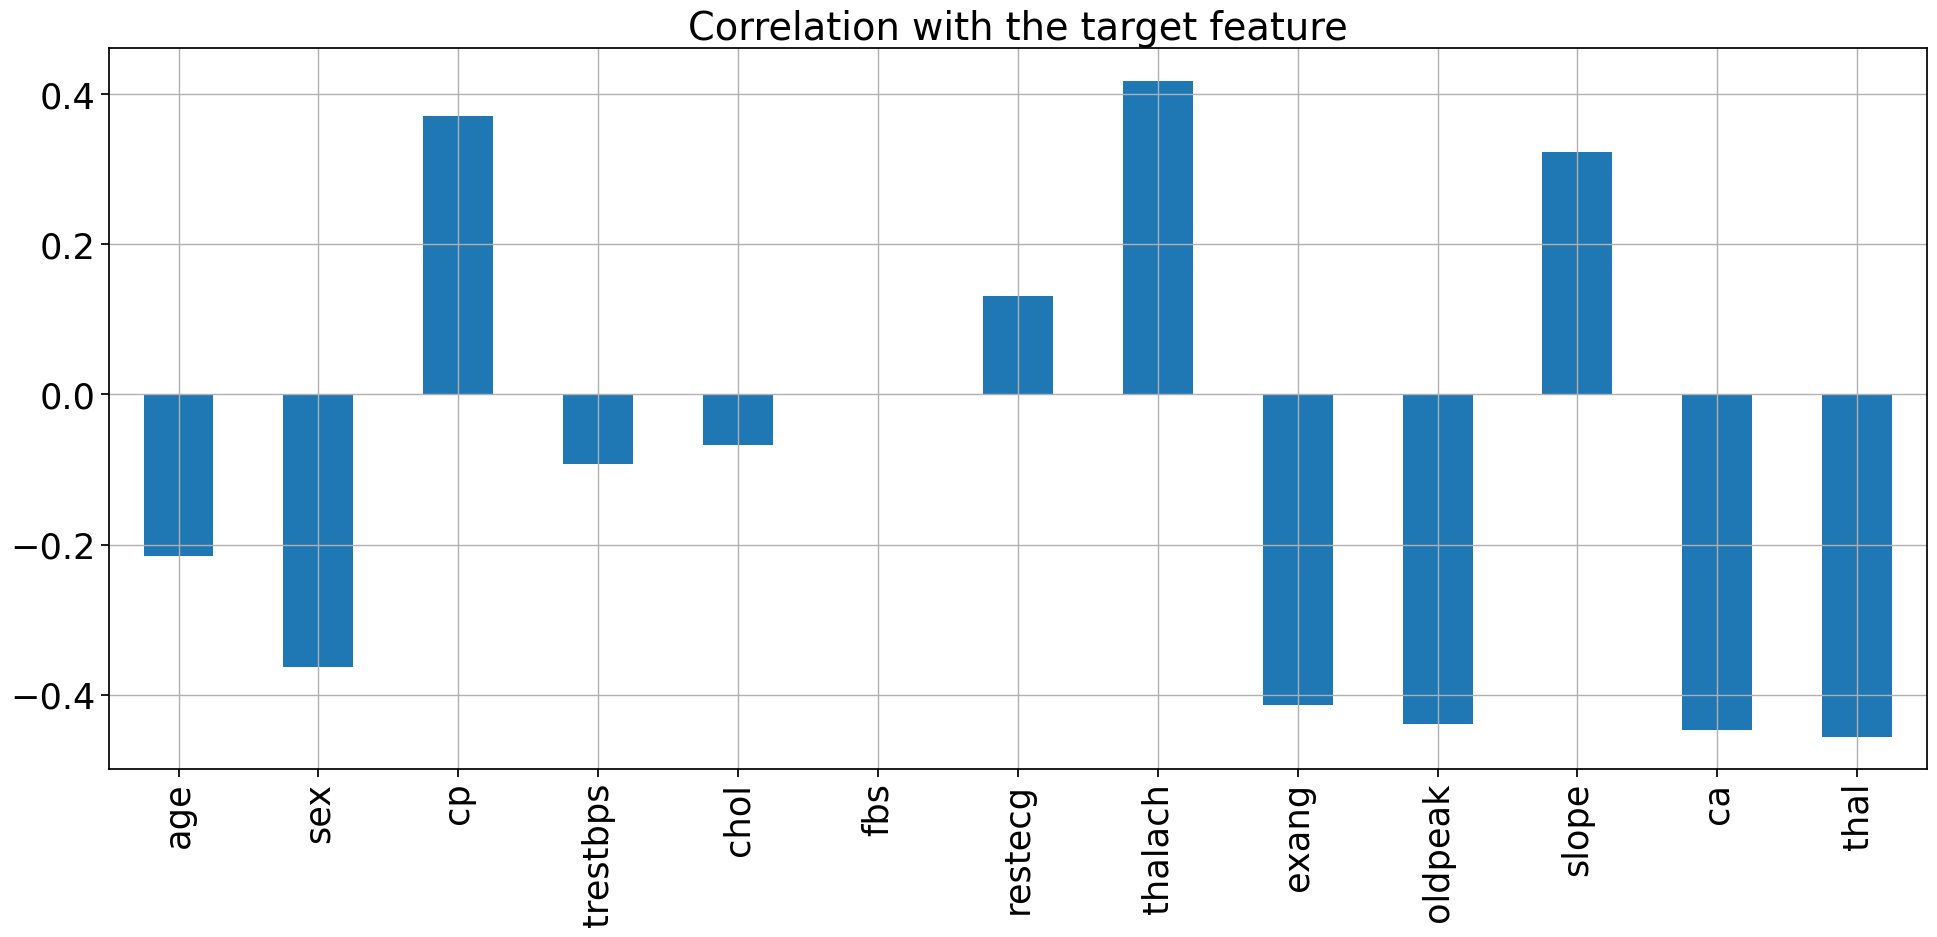

In [80]:
sns.set_context('notebook',font_scale = 2.3)
df.drop('target', axis=1).corrwith(df.target).plot(kind='bar', grid=True, figsize=(20, 10), 
                                                        title="Correlation with the target feature")
plt.tight_layout()

In [81]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,228.000000,228.000000,228.000000,228.000000,228.000000,228.0,228.000000,228.000000,228.000000,228.000000,228.000000,228.00000,228.000000,228.000000
mean,53.333333,0.675439,0.942982,128.671053,242.372807,0.0,0.548246,151.070175,0.315789,0.946053,1.451754,0.47807,2.315789,0.578947
std,9.229016,0.469241,1.020190,15.349142,44.329827,0.0,0.516125,22.492963,0.465852,1.035422,0.587945,0.69893,0.560299,0.494814
min,29.000000,0.000000,0.000000,94.000000,131.000000,0.0,0.000000,88.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
25%,45.000000,0.000000,0.000000,120.000000,209.750000,0.0,0.000000,137.500000,0.000000,0.000000,1.000000,0.00000,2.000000,0.000000
50%,54.000000,1.000000,1.000000,130.000000,239.000000,0.0,1.000000,155.000000,0.000000,0.600000,1.500000,0.00000,2.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,269.250000,0.0,1.000000,168.250000,1.000000,1.600000,2.000000,1.00000,3.000000,1.000000
max,76.000000,1.000000,3.000000,170.000000,360.000000,0.0,2.000000,202.000000,1.000000,4.000000,2.000000,2.00000,3.000000,1.000000


In [82]:
#Feature Scalling
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
dataset = pd.get_dummies(df,columns=['sex','cp','fbs','restecg','exang','slope','ca','thal']) #creating my dummy variable
columns_to_scale= ['age','trestbps','chol','thalach','oldpeak'] # we have taken these columns for scale down
dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])

In [83]:
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,exang_1,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,thal_1,thal_2,thal_3
1,-1.773674,0.086772,0.172434,1.600895,2.472003,1,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
2,-1.339305,0.086772,-0.867525,0.932553,0.439382,1,1,0,0,1,...,0,0,0,1,1,0,0,0,1,0
3,0.289579,-0.566164,-0.144075,1.199890,-0.141366,1,0,1,0,1,...,0,0,0,1,1,0,0,0,1,0
4,0.398172,-0.566164,2.523646,0.531547,-0.334949,1,1,0,1,0,...,1,0,0,1,1,0,0,0,1,0
5,0.398172,0.739707,-1.138819,-0.136795,-0.528532,1,0,1,1,0,...,0,0,1,0,1,0,0,1,0,0


In [84]:
dataset.tail() #we have choosen data from bottom

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,exang_1,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,thal_1,thal_2,thal_3
296,1.049726,-0.304990,-1.025780,-0.671469,-0.915698,0,1,0,1,0,...,1,0,1,0,1,0,0,0,1,0
298,0.398172,0.739707,-0.031036,-1.250699,-0.722115,0,1,0,1,0,...,1,0,1,0,1,0,0,0,0,1
299,-0.904936,-1.219100,0.488943,-0.849694,0.245799,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,1
301,0.398172,0.086772,-2.517895,-1.607149,0.245799,0,0,1,1,0,...,1,0,1,0,0,1,0,0,0,1
302,0.398172,0.086772,-0.144075,1.021665,-0.915698,0,1,0,0,1,...,0,0,1,0,0,1,0,0,1,0


In [85]:
dataset.describe()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,exang_1,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,thal_1,thal_2,thal_3
count,2.280000e+02,2.280000e+02,2.280000e+02,2.280000e+02,2.280000e+02,228.000000,228.000000,228.000000,228.000000,228.000000,...,228.000000,228.000000,228.000000,228.0000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000
mean,-3.569270e-16,-7.855558e-16,-7.413660e-17,-1.675073e-16,-2.415222e-16,0.578947,0.324561,0.675439,0.473684,0.184211,...,0.315789,0.048246,0.451754,0.5000,0.640351,0.241228,0.118421,0.048246,0.587719,0.364035
std,1.002200e+00,1.002200e+00,1.002200e+00,1.002200e+00,1.002200e+00,0.494814,0.469241,0.469241,0.500406,0.388509,...,0.465852,0.214756,0.498762,0.5011,0.480953,0.428770,0.323817,0.214756,0.493328,0.482217
min,-2.642413e+00,-2.263797e+00,-2.517895e+00,-2.810165e+00,-9.156982e-01,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-9.049359e-01,-5.661639e-01,-7.375302e-01,-6.046350e-01,-9.156982e-01,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.239487e-02,8.677171e-02,-7.625177e-02,1.750979e-01,-3.349494e-01,1.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.5000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,7.239487e-01,7.397074e-01,6.076344e-01,7.654671e-01,6.329653e-01,1.000000,1.000000,1.000000,1.000000,0.000000,...,1.000000,0.000000,1.000000,1.0000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,2.461426e+00,2.698514e+00,2.659293e+00,2.269238e+00,2.955960e+00,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [86]:
#model selection
y= dataset['target']
x= dataset.drop(['target'],axis=1)

In [87]:
from sklearn.model_selection import train_test_split

In [88]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=5)

In [89]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [90]:
#K - Nearest Neighbor classifier
import warnings
warnings.filterwarnings('ignore')
knn_classifier = KNeighborsClassifier(n_neighbors = 5)
knn_classifier.fit(x_train,y_train)
score = cross_val_score(knn_classifier,x_train,y_train,cv=10)
y_pred_knn=knn_classifier.predict(x_test)
accuracy_score(y_test,y_pred_knn)

0.9130434782608695

In [91]:
score.mean()

0.8014619883040934

In [92]:
#hyper parameter tunning
knn_classifier = KNeighborsClassifier(algorithm='auto',leaf_size=30,metric='minkowski',
                                      metric_params=None, n_jobs=1,n_neighbors=5,p=1,weights='uniform')
knn_classifier.fit(x_train,y_train)
score=cross_val_score(knn_classifier,x_train,y_train,cv=10)
y_pred_knn=knn_classifier.predict(x_test)
accuracy_score(y_test,y_pred_knn)
#hence accuracy increases after Hyper parameter tunning


0.9782608695652174

In [93]:
score=cross_val_score(knn_classifier,x_train,y_train,cv=10)
score.mean()

0.8289473684210528

In [94]:
#printing the classification report
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        16
           1       0.97      1.00      0.98        30

    accuracy                           0.98        46
   macro avg       0.98      0.97      0.98        46
weighted avg       0.98      0.98      0.98        46



In [95]:
#random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred_rf = rf.predict(x_test)
accuracy_score(y_test,y_pred_rf)

0.9130434782608695

In [96]:
#Decison Tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred_dt = dt.predict(x_test)
accuracy_score(y_test,y_pred_dt)

0.8478260869565217

In [97]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(x_train,y_train)
y_pred_lr = log.predict(x_test)
accuracy_score(y_test,y_pred_lr)

0.8695652173913043

In [98]:
final_data = pd.DataFrame({'Models':['Logistic Regression','Decision Tree','Random Forest','K-Nearest Neighbour'],
                          'ACC':[accuracy_score(y_test,y_pred_lr)*100,
                                accuracy_score(y_test,y_pred_dt)*100,
                                accuracy_score(y_test,y_pred_rf)*100,
                                accuracy_score(y_test,y_pred_knn)*100,]})final_data

SyntaxError: invalid syntax (3777581.py, line 5)

AxesSubplot(0.125,0.11;0.775x0.77)


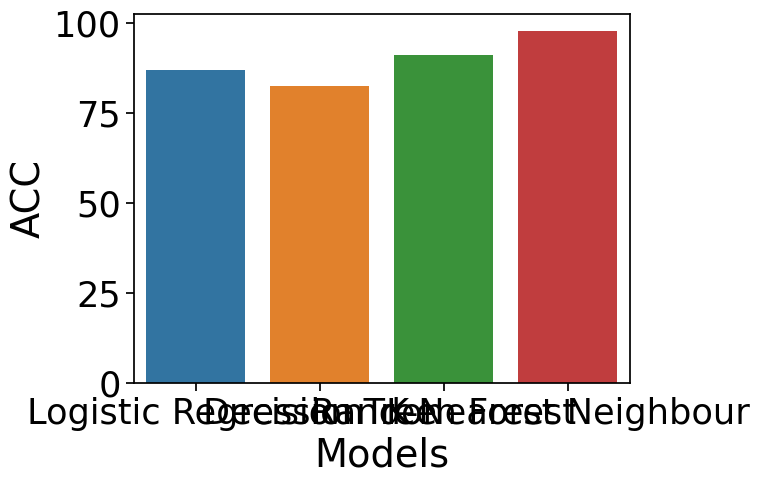

In [99]:
import seaborn as sns
print(sns.barplot(final_data['Models'],final_data['ACC']))

In [101]:
## Pickle
import pickle
import joblib

'''
filename='heart'
pickle.dump(knn_classifier,open(filename,'wb'))

# save model
#pickle.dump(knn_classifier, open('model.pkl', 'wb'))

# load model
Heart_disease_detector_model = pickle.load(open(filename,'rb'))

# predict the output
y_pred = Heart_disease_detector_model.predict(x_test)

# confusion matrix
print('Confusion matrix of K – Nearest Neighbor model: \n',confusion_matrix(y_test, y_pred),'\n')

# show the accuracy
print('Accuracy of K – Nearest Neighbor  model = ',accuracy_score(y_test, y_pred))'''


"\nfilename='heart'\npickle.dump(knn_classifier,open(filename,'wb'))\n\n# save model\n#pickle.dump(knn_classifier, open('model.pkl', 'wb'))\n\n# load model\nHeart_disease_detector_model = pickle.load(open(filename,'rb'))\n\n# predict the output\ny_pred = Heart_disease_detector_model.predict(x_test)\n\n# confusion matrix\nprint('Confusion matrix of K – Nearest Neighbor model: \n',confusion_matrix(y_test, y_pred),'\n')\n\n# show the accuracy\nprint('Accuracy of K – Nearest Neighbor  model = ',accuracy_score(y_test, y_pred))"

In [102]:
import pickle
import joblib
# saving our model # model - model , filename-model_jlib
joblib.dump(knn_classifier, 'model_jlib')


# opening the file- model_jlib
Heart_disease_detector_model = joblib.load('model_jlib')

# predict the output
y_pred = Heart_disease_detector_model.predict(x_test)

# confusion matrix
print('Confusion matrix of K – Nearest Neighbor model: \n',confusion_matrix(y_test, y_pred),'\n')

# show the accuracy
print('Accuracy of K – Nearest Neighbor  model = ',accuracy_score(y_test, y_pred))



Confusion matrix of K – Nearest Neighbor model: 
 [[15  1]
 [ 0 30]] 

Accuracy of K – Nearest Neighbor  model =  0.9782608695652174


In [103]:
import pickle
pickle.dump(knn_classifier,open('heart_model.pkl','wb'))

